In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data into dataframe
df = pd.read_csv('data/customer_churn_dataset.csv')
df.head(5)

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes


In [3]:
# basic information about the dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
print(df.info())

Rows: 20000, Columns: 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20000 non-null  int64  
 1   tenure            20000 non-null  int64  
 2   monthly_charges   20000 non-null  float64
 3   total_charges     20000 non-null  float64
 4   contract          20000 non-null  object 
 5   payment_method    20000 non-null  object 
 6   internet_service  17987 non-null  object 
 7   tech_support      20000 non-null  object 
 8   online_security   20000 non-null  object 
 9   support_calls     20000 non-null  int64  
 10  churn             20000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB
None


In [4]:
# aggregate statistics
df.describe()

,customer_id,tenure,monthly_charges,total_charges,support_calls
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,10000.500000,36.467450,70.010531,2543.979209,1.51255
std,5773.647028,20.773984,28.890239,1882.949804,1.23524
min,1.000000,1.000000,20.000000,20.230000,0.00000
25%,5000.750000,18.000000,45.210000,1045.837500,1.00000
50%,10000.500000,36.000000,70.090000,2096.495000,1.00000
75%,15000.250000,54.000000,95.072500,3690.337500,2.00000
max,20000.000000,72.000000,120.000000,8629.920000,8.00000


In [5]:
# check for null values
print(df.isnull().sum())

customer_id            0
tenure                 0
monthly_charges        0
total_charges          0
contract               0
payment_method         0
internet_service    2013
tech_support           0
online_security        0
support_calls          0
churn                  0
dtype: int64


In [6]:
# cast all columns to correct data type and handle missing values by filling with "Unknown Service"
df["customer_id"] = df["customer_id"].astype("int64")
df["tenure"] = df["tenure"].astype("int64")
df["monthly_charges"] = df["monthly_charges"].astype("float64")
df["total_charges"] = pd.to_numeric(df["total_charges"], errors='coerce')
df["contract"] = df["contract"].astype("category")
df["payment_method"] = df["payment_method"].astype("category")
# almost 10% of the dataset has missing values for internet_service, so better to fill than to drop
df["internet_service"] = df["internet_service"].fillna("Unknown Service")
df["internet_service"] = df["internet_service"].astype("category")
df["tech_support"] = df["tech_support"].apply(lambda x: True if x == 'Yes' else False).astype("bool")
df["online_security"] = df["online_security"].apply(lambda x: True if x == 'Yes' else False).astype("bool")
df["support_calls"] = df["support_calls"].astype("int64")
df["churn"] = df["churn"].apply(lambda x: True if x == 'Yes' else False).astype("bool")

print(df.isnull().sum())
print(df.info())

customer_id         0
tenure              0
monthly_charges     0
total_charges       0
contract            0
payment_method      0
internet_service    0
tech_support        0
online_security     0
support_calls       0
churn               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       20000 non-null  int64   
 1   tenure            20000 non-null  int64   
 2   monthly_charges   20000 non-null  float64 
 3   total_charges     20000 non-null  float64 
 4   contract          20000 non-null  category
 5   payment_method    20000 non-null  category
 6   internet_service  20000 non-null  category
 7   tech_support      20000 non-null  bool    
 8   online_security   20000 non-null  bool    
 9   support_calls     20000 non-null  int64   
 10  churn             20000 non-null  bool    
dtypes: bool

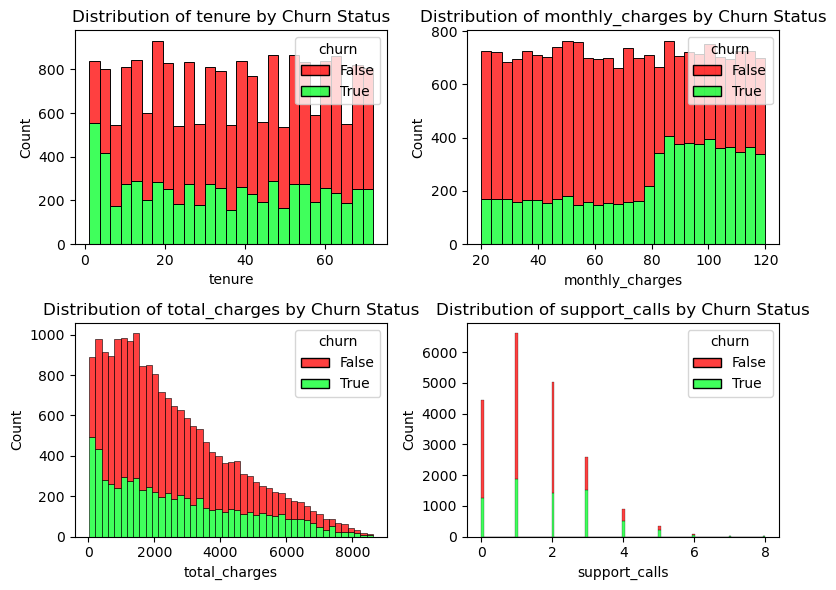

In [17]:
# make a subplot with all numerical features distributions against churn
numerical_features = ["tenure", "monthly_charges", "total_charges", "support_calls"]
fig, axes = plt.subplots(len(numerical_features) // 2, 2, figsize=(8, 6))
# create hex map for red green colors for true, false
hex_map = {np.True_: "#00FF26", np.False_: "#FF0000"}
for i, feature in enumerate(numerical_features):
    sns.histplot(data=df, x=feature, hue="churn", multiple="stack", ax=axes[i // 2, i % 2], palette=hex_map)
    axes[i // 2, i % 2].set_title(f'Distribution of {feature} by Churn Status')
plt.tight_layout()
plt.show()


- A lot more false churns than true turns in all distributions, this is to be expected 

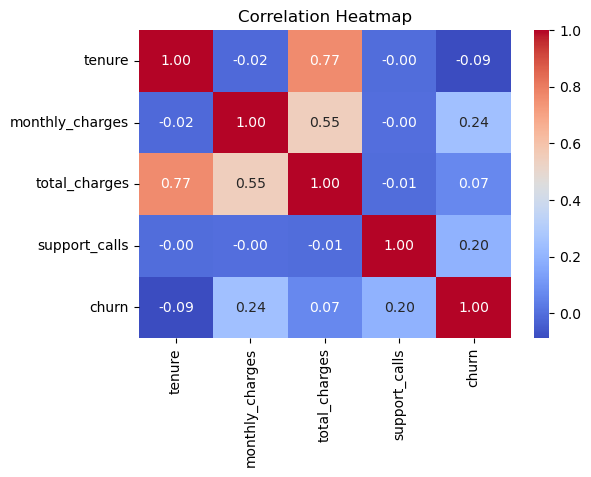

In [19]:
# correlation heatmap
corr = df[numerical_features + ["churn"]].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

- Not much correlation between numerical features and churn, but monthly_charges has the highest positive correlation with churn
- We can also see that since tenure has a negative correlation with churn and monthly_charges has a positive correlation with churn, total charges (which is tenure * monthly_charges) has a very weak correlation with churn since it's getting "pulled" in both directions